# Rearch Pathway 3 - Siying Liu

In [3]:
 try:
     %pip install --user "oracledb" --no-warn-script-location
 except Exception as e:
     print("\x1b[31m\u2717 Unexpected error! Please contact course staff\n" +
          "Please include the entire text above and below in your message.")
     raise

Note: you may need to restart the kernel to use updated packages.


In [40]:
import oracledb
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
dsn = oracledb.makedsn("localhost", 1522, service_name="stu")
connection = oracledb.connect(user="ora_liusy21", password="a30103485", dsn=dsn)
cur = connection.cursor()

In [42]:
cur.execute("""
    CREATE OR REPLACE VIEW count_by_description AS
    SELECT 
        Year,
        PQIDescription,
        SUM(Count_ICD10) AS total_count
    FROM Counties
    GROUP BY Year, PQIDescription
    ORDER BY Year, PQIDescription
""")


In [31]:
cur.execute("""
    CREATE OR REPLACE VIEW prop_by_description AS
    SELECT
        c.Year,
        c.PQIDescription,
        c.total_count,
        ROUND ((c.total_count * 100.0) / y.year_total, 2) AS percentage
    FROM count_by_description c
    JOIN (
        SELECT Year, SUM(total_count) AS year_total
        FROM count_by_description
        GROUP BY Year) y ON c.Year = y.Year
    ORDER BY c.Year, percentage DESC
    """)


## Visualization of results

In [43]:
df = pd.read_sql_query("SELECT * FROM prop_by_description", cur.connection)
df.head(10)


/tmp/ipykernel_1161/1488075703.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM prop_by_description", cur.connection)


,YEAR,PQIDESCRIPTION,TOTAL_COUNT,PERCENTAGE
0,2016,Diabetes Composite,109018,51.78
1,2016,Diabetes Long-term Complications,45862,21.78
2,2016,Diabetes Short-term Complications,36182,17.19
3,2016,Uncontrolled Diabetes,19462,9.24
4,2017,Diabetes Composite,115198,51.50
5,2017,Diabetes Long-term Complications,54512,24.37
6,2017,Diabetes Short-term Complications,35424,15.84
7,2017,Uncontrolled Diabetes,18532,8.29
8,2018,Diabetes Composite,115446,51.63
9,2018,Diabetes Long-term Complications,53782,24.05


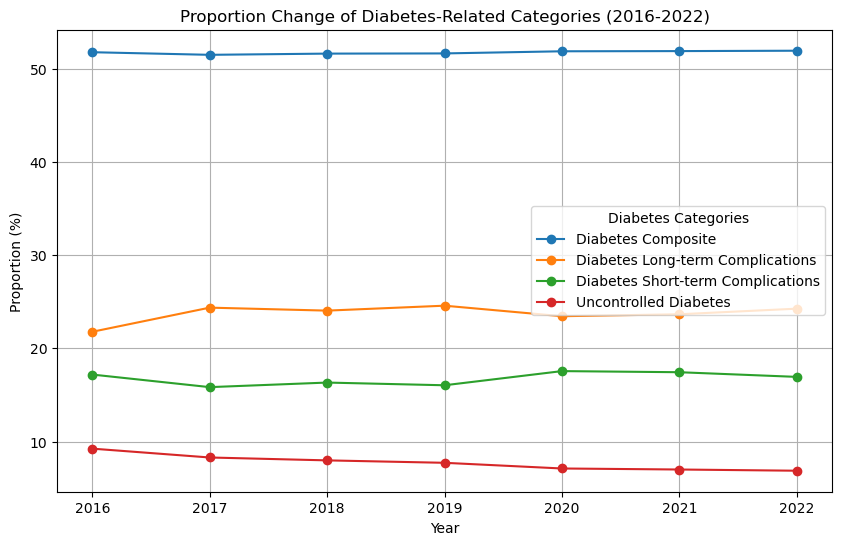

In [47]:
category_proportions = {}
for row in cur.execute("""
    SELECT Year, PQIDescription, percentage
    FROM prop_by_description
    ORDER BY Year, PQIDescription
"""):
    year = row[0]
    description = row[1]
    percentage = row[2]
    
    # Organize data by description, adding the years and their corresponding percentages
    if description not in category_proportions:
        category_proportions[description] = {'years': [], 'percentages': []}
    
    category_proportions[description]['years'].append(year)
    category_proportions[description]['percentages'].append(percentage)

# Create the line chart to show proportions over years
plt.figure(figsize=(10, 6))

# Plot each category's proportion across the years
for description, data in category_proportions.items():
    plt.plot(data['years'], data['percentages'], marker='o', label=description)

plt.title('Proportion Change of Diabetes-Related Categories (2016-2022)')
plt.xlabel('Year')
plt.ylabel('Proportion (%)')
plt.legend(title="Diabetes Categories")
plt.grid(True)
plt.show()


The plot shows the change of percentages for each diabetes categories from 2016 to 2022

In [ ]:
cur.close()
connection.close()